## ANAL ises:
    1. Pelos dados da análise, o número de participações de menores nos crime abordados é bastante pequeno em relação ao total o que nos poderia dar ideia de que a maior idade cumpre seu papel nos states, mas tratando o grupo de menores como um todo e olhamos para os que responderima por seu crime na região dos estados unidos, analise (meme)
    
    2 Analisar a coluna dos states houses e fazer uma inferencia política 
    
    3 Mapa de calor de onde acontece mais crimes (nao sabemos como faz entao se garantia)
    
    4 O mês em que ocorrem mais crimes e realizar inferencias com datas especiais
    
    5 Crimes domesticos
    
    

In [1]:


%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')

In [2]:
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,...,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.ch

# Numero médio de pessoas feridas 


In [3]:
mediaNumeroFeridos = pd.DataFrame(df,columns=['n_injured'])
mediaNumeroFeridos.mean()

n_injured    0.494007
dtype: float64

# 5 estados com mais crimes a mão armada

<AxesSubplot:>

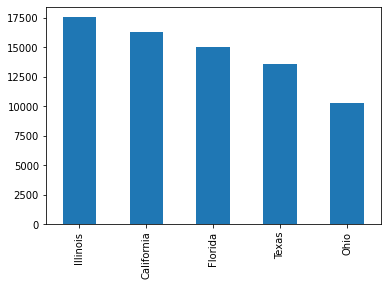

In [4]:
df["state"].value_counts().head().plot.bar()

<h1 align='center'> Análise de procedência das armas que aparecem nos crimes</h1>

1. Tratando dados agrupados do Dataframe nas colunas que definem o tipo de arma e sua procedência:


In [5]:
df_top_armas = pd.DataFrame(df, columns=['gun_stolen','gun_type']).dropna()

df_top_armas = pd.DataFrame(df_top_armas.apply(lambda x: x.str.split('\|\|').explode()), columns=['gun_stolen','gun_type'])
df_top_armas = pd.DataFrame(df_top_armas.apply(lambda x: x.str.split('::').explode()).reset_index(), columns=['gun_stolen','gun_type'])
df_top_armas = pd.DataFrame(df_top_armas.apply(lambda x: x.str.split('\|').explode()),columns=['gun_stolen','gun_type'])
df_top_armas = pd.DataFrame(df_top_armas.apply(lambda x: x.str.split(':').explode()).reset_index(), columns=['gun_stolen','gun_type'])


2. Agrupando top 10 armas que são de posse de quem está portando durante a ocorrência

<AxesSubplot:>

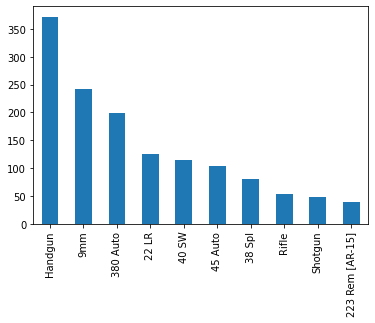

In [6]:
top10_armas_nao_roubadas = df_top_armas[(df_top_armas.gun_type.index % 2 != 0) 
                          & (df_top_armas.gun_type != 'Unknown')
                          & (df_top_armas.gun_stolen == 'Not-stolen')].gun_type.value_counts().head(10)
top10_armas_nao_roubadas.plot.bar()

3. Agrupando top 10 armas que **não** são de posse de quem está a portando durante a ocorrência

<AxesSubplot:>

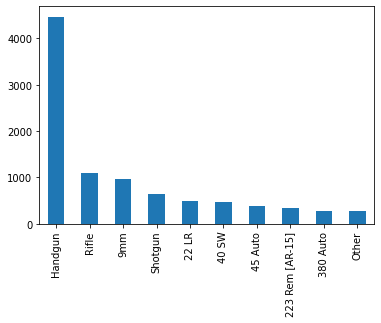

In [7]:
top10_armas_roubadas =  df_top_armas[(df_top_armas.gun_type.index % 2 != 0) 
                                    &(df_top_armas.gun_type != 'Unknown') 
                                    &(df_top_armas.gun_stolen == 'Stolen') ].gun_type.value_counts().head(10)

top10_armas_roubadas.plot.bar()

4. Agrupando top 10 armas que **não se sabe a procedência**

<AxesSubplot:>

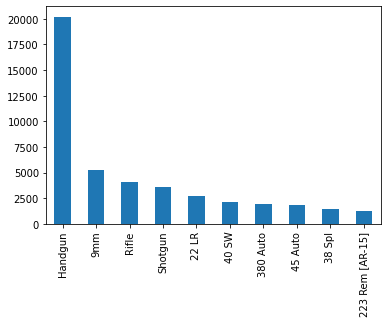

In [8]:
top10_armas_sem_proc = df_top_armas[(df_top_armas.gun_type.index % 2 != 0) 
                          & (df_top_armas.gun_type != 'Unknown')
                          & (df_top_armas.gun_stolen == 'Unknown')].gun_type.value_counts().head(10)

top10_armas_sem_proc.plot.bar()

5. Visualização que relaciona a arma com maiores índices nos tópicos 2 a 4

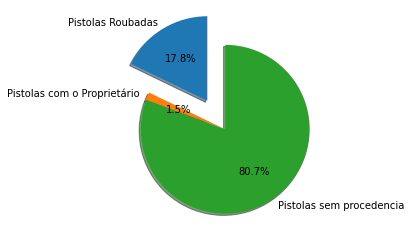

In [9]:
values = []
values.append(int(top10_armas_roubadas['Handgun']))
values.append(int(top10_armas_nao_roubadas['Handgun']))
values.append(int(top10_armas_sem_proc['Handgun']))

labels = 'Pistolas Roubadas','Pistolas com o Proprietário','Pistolas sem procedencia'

explode = (0.4, 0,0)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<h2 align='center'>Conclusões com os dados analisados:</h2>
É visível que a pistola(Handgun) é o tipo de arma mais comum durante crimes, porém, somente em menos de 20% das ocorrências se sabe a procedência das armas, o que não nos dá um poder de conclusões concretas sobre o a influência do porte livre de armas sobre os crimes, mas ainda sim, existe um indicio de que a influência é mínima visto que a quantidade de crimes com armas roubadas é mais que 10 vezes à quantidade de crimes com armas nas mãos de seus proprietários.

- - -

<h1 align='center'>Locais públicos com maior incidência de crimes</h1>


Nosso dataframe contra com 82% de dados nulos (acho melhor tirar essa porra aqui)

In [10]:
locaisPublicos = pd.DataFrame(pd.DataFrame(df,columns=['location_description']).dropna().location_description.value_counts().head(10))
locaisPublicos

,location_description
Austin,240
Walmart,232
7-Eleven,166
Motel 6,152
McDonald's,150
Dallas/Ft Worth Intl Airport (DFW),132
WalMart,119
Dollar General,107
Shell,103
Lawndale,103


/home/ubiratan/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


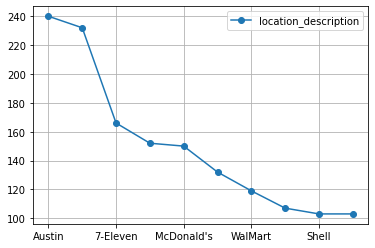

In [11]:
locaisPublicos.plot(marker='o').grid()

---

# Número de criminosos com +18 vs. -18

In [12]:
participants = pd.DataFrame(df,columns=['participant_age_group','participant_type']).dropna()

In [13]:

participantsGroupDistintos = []
for i in range(participants.shape[0]):
    ageGroupPorLinha = participants.values[i][0]
    typePorLinha = participants.values[i][1]
    
    ageGroupSeparados = ageGroupPorLinha.split('||')
    typeSeparados = typePorLinha.split('||')
    
    for j in range(len(ageGroupSeparados)):
        if("Victim" not in typeSeparados[j]):
            if("::" in ageGroupSeparados[j]):
                participantsGroupDistintos.append(ageGroupSeparados[j].split('::')[1])


In [14]:
participantsDF = pd.DataFrame(participantsGroupDistintos,columns=['Faixa_Etaria'])

adultos = participantsDF[participantsDF.Faixa_Etaria == 'Adult 18+'].Faixa_Etaria.value_counts().sum()
menores = participantsDF[participantsDF.Faixa_Etaria != 'Adult 18+'].Faixa_Etaria.value_counts().sum()
faixaEtaria = [adultos,menores]
pd.DataFrame(faixaEtaria,columns=['Quantidade'], index=['Adultos','Menores'])
#Procurar um gráfico que melhore a visu

,Quantidade
Adultos,144462
Menores,13063


<AxesSubplot:ylabel='Faixa_Etaria'>

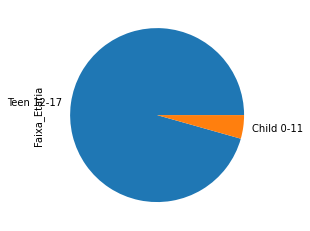

In [15]:
participantsDF[participantsDF.Faixa_Etaria != 'Adult 18+'].Faixa_Etaria.value_counts().plot.pie()

Pelos dados onde houveram registros das idades dos participantes, a análise nos mostra que o número de participações de menores nos crime abordados é bastante pequeno, cerca de 0,0829% em relação ao total. 

O que nos poderia dar a ideia de que a maior idade cumpre seu papel nos EUA, além disso, vale ressaltar que tratando **o grupo de menores como um todo** e olhando para os que responderiam em julgado por seu crime na região, temos uma quantidade representativa de adolescentes em uma faixa etária que vai de 12-17 anos. O que nos leva a considerar que, se por acaso, a idade em que tais indivíduos tivessem que responder por suas ações fosse maior, uma quantidade considerável dos crimes de menores sairiam impunes.

###### Obs: Adolescentes nos EUA a partir dos 12 anos já devem responder a seus crimes, tendo como consequência a reclusão até que completem a maior idade.

- - - 

<h1 align='center'> Datas Comemorativas </h1>

## Dia 4 de Julho (Dia da Independência norte-americana)

In [16]:
dates = pd.DataFrame(df,columns=['date','n_killed','n_injured']).dropna()

### Para o ano de 2014

In [17]:
ano2014 = dates[dates.date == '2014-07-04']
print("Número de incidências: %d" %ano2014.shape[0])
print("Numéro de mortos: %d" %ano2014.n_killed.sum())
print("Número de feridos: %d" %ano2014.n_injured.sum())

Número de incidências: 192
Numéro de mortos: 48
Número de feridos: 92


### Para o ano de 2015

In [18]:
ano2015 = dates[dates.date == '2015-07-04']
print("Número de incidências: %d" %ano2015.shape[0])
print("Numéro de mortos: %d" %ano2015.n_killed.sum())
print("Número de feridos: %d" %ano2015.n_injured.sum())

Número de incidências: 211
Numéro de mortos: 60
Número de feridos: 142


### Para o ano de 2016

In [19]:
ano2016 = dates[dates.date == '2016-07-04']
print("Número de incidências: %d" %ano2016.shape[0])
print("Numéro de mortos: %d" %ano2016.n_killed.sum())
print("Número de feridos: %d" %ano2016.n_injured.sum())

Número de incidências: 224
Numéro de mortos: 53
Número de feridos: 163


### Para o ano de 2017

In [20]:
ano2017 = dates[dates.date == '2017-07-04']
print("Número de incidências: %d" %ano2017.shape[0])
print("Numéro de mortos: %d" %ano2017.n_killed.sum())
print("Número de feridos: %d" %ano2017.n_injured.sum())

Número de incidências: 248
Numéro de mortos: 62
Número de feridos: 146


## Dia 5 de Julho (Dia posterior ao dia da independência)

<AxesSubplot:>

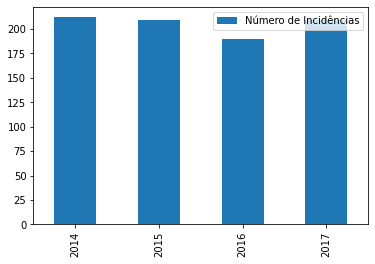

In [21]:
afterIDAno2014 = dates [dates.date == '2014-07-05']
afterIDAno2015 = dates[dates.date == '2015-07-05']
afterIDAno2016 = dates[dates.date == '2016-07-05']
afterIDAno2017 = dates[dates.date == '2017-07-05']
diaCinco = [afterIDAno2014.shape[0],afterIDAno2015.shape[0],afterIDAno2016.shape[0],afterIDAno2017.shape[0]]
pd.DataFrame(diaCinco,columns=['Número de Incidências'], index=['2014','2015','2016','2017']).plot.bar()

Utilizados para esta análise os dados relativos aos anos de 2014 à 2017. Como vimos, existe um número elevado de incidentes relacionados aos dias 4 e 5 de julho, onde temos um importante feriado para o país, tornando-as uma das datas mais perigosas do ano.